In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import NeuralNetwork as NN
import FFNetwork as FF
import Layer
import importlib
import time
from IPython.display import display
from ipywidgets import FloatProgress
from copy import deepcopy
importlib.reload(NN)
importlib.reload(Layer);

dtype = torch.float
device = torch.device("cpu")
device = torch.device("cuda:0")

In [2]:
def ClassPlot(x, labels=[], idx=(1,2)):
    # FeedForward
    #yc = Network.OneHot(y)
    if len(labels)>0:
        colour_options = ['y', 'r', 'g', 'b', 'k']
        cidx = np.argmax(labels, axis=1)
        colours = [colour_options[k] for k in cidx]
        plt.scatter(x[:,idx[0]], x[:,idx[1]], color=colours, marker='.')
    else:
        plt.scatter(x[:,idx[0]], x[:,idx[1]], marker='.')
    plt.axis('equal');

## Create a simple dataset

In [3]:
class_dim = 2
mid_dim = 3
sensory_dim = 4

In [4]:
# This creates a 3D -> 2D dataset
# A X = I
# where all elements of X are in (-1,1).
seed = 314 #43 #572 5928 296 43 2967 3947 295
torch.manual_seed(seed)
np.random.seed(seed)
B = np.eye(class_dim)
X = 3.*(np.random.rand(sensory_dim, class_dim) - 0.5)
A = X.T
print('Class vectors')
print(B)
print('Sensory vectors')
print(A)
#print('System matrix:\n'+str(M))

Class vectors
[[1. 0.]
 [0. 1.]]
Sensory vectors
[[ 1.25062074 -0.70485675  1.25400319  0.68385445]
 [ 0.26562574  0.84961614  0.98206504 -0.71855873]]


In [5]:
# Use A and B to make a dataset
#n_classes, top_dim = np.shape(A)
#bottom_dim = n_classes

training_samples = 300
noise = 0.2
training_input = []
training_output = []
for n in range(training_samples):
    r = np.random.randint(class_dim)
    training_input.append(B[r])
    training_output.append(A[r]+noise*np.random.normal(size=np.shape(A[r])))

training_input = torch.tensor(training_input).float()
training_output = torch.tensor(training_output).float()
train = [training_input, training_output]

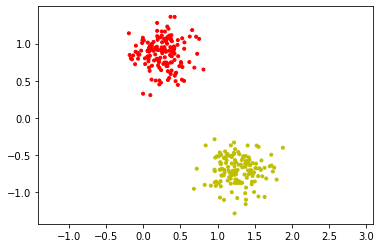

In [6]:
ClassPlot(train[1], labels=train[0], idx=(0,1))

## Create a PC Network

In [7]:
net = NN.NeuralNetwork()
net.AddLayer(Layer.InputPELayer(n=class_dim))
net.AddLayer(Layer.PELayer(n=mid_dim))
net.AddLayer(Layer.TopPELayer(n=sensory_dim))

sym = False
af = 'identity'
net.Connect(0, 1, act=af, symmetric=sym)
net.Connect(1, 2, act=af, symmetric=sym)

net.SetTau(0.2)
net.learning_tau = 0.08
net.learn_biases = False

identity
identity


In [ ]:
net.Save('initial_stability_test_weights.npy')

In [ ]:
net = NN.NeuralNetwork()
net.Load('initial_stability_test_weights.npy')

In [8]:
for c in net.connections:
    print(c.M)
    print(c.W)

tensor([[ 0.1362, -0.0276],
        [-0.0042,  0.1678],
        [-0.4093,  0.2584]], device='cuda:0')
tensor([[-0.4525,  0.1866,  0.4653],
        [-0.1823,  0.2105,  0.2699]], device='cuda:0')
tensor([[-0.4687,  0.0625, -0.0651],
        [ 0.1277, -0.0915,  0.1166],
        [-0.7612, -0.6634,  0.4521],
        [-0.4699,  0.2162, -0.3541]], device='cuda:0')
tensor([[ 0.0125, -0.2355,  0.3830, -0.1577],
        [-0.0859,  0.0553, -0.3772, -0.2095],
        [ 0.1666, -0.5474,  0.4230,  0.5422]], device='cuda:0')


## Train Feedforward Network

In [9]:
# Create a network
mid_dim = 3
ffnet = FF.Network()

af = 'identity'#'logistic'
ffnet.AddLayer(FF.Layer(n_nodes=sensory_dim, act=af))
ffnet.AddLayer(FF.Layer(n_nodes=mid_dim, act=af))
ffnet.AddLayer(FF.Layer(n_nodes=class_dim, act=af))

cost = 'MSE'#'cross-entropy'
ffnet.SetCostFunction(cost)

initial_weights_0 = deepcopy(ffnet.W[0])
initial_weights_1 = deepcopy(ffnet.W[1])

In [10]:
ffnet.W[0] = initial_weights_0
ffnet.W[1] = initial_weights_1

progress = ffnet.SGD(train[1].numpy(), train[0].numpy(), lrate=0.01, weight_decay=0.006, bias_decay=0.0, epochs=500, batch_size=30)

Epoch 0: Cost = 2.626485871281894
Epoch 1: Cost = 1.0354461029019337
Epoch 2: Cost = 0.5654492111108728
Epoch 3: Cost = 0.3652894265704612
Epoch 4: Cost = 0.25739818172588685
Epoch 5: Cost = 0.19563687270848257
Epoch 6: Cost = 0.15279044439689002
Epoch 7: Cost = 0.1251320034432349
Epoch 8: Cost = 0.10655858774364932
Epoch 9: Cost = 0.09408802218775615
Epoch 10: Cost = 0.08470604885895341
Epoch 11: Cost = 0.0789190081491
Epoch 12: Cost = 0.07520196119213071
Epoch 13: Cost = 0.07329266839823705
Epoch 14: Cost = 0.07241324870508814
Epoch 15: Cost = 0.07279774161345916
Epoch 16: Cost = 0.07381171816995914
Epoch 17: Cost = 0.0752765553502876
Epoch 18: Cost = 0.07731449229037164
Epoch 19: Cost = 0.07980113490968234
Epoch 20: Cost = 0.0825351458156218
Epoch 21: Cost = 0.08557671929211602
Epoch 22: Cost = 0.08899014524040005
Epoch 23: Cost = 0.09251033716301711
Epoch 24: Cost = 0.09619709582636979
Epoch 25: Cost = 0.10009795088275888
Epoch 26: Cost = 0.10415380117995175
Epoch 27: Cost = 0.1083

Epoch 329: Cost = 0.25497385472866263
Epoch 330: Cost = 0.25498828780704114
Epoch 331: Cost = 0.25498067653478035
Epoch 332: Cost = 0.25498050738281547
Epoch 333: Cost = 0.2549805684313641
Epoch 334: Cost = 0.25499292021177355
Epoch 335: Cost = 0.2549948187286446
Epoch 336: Cost = 0.2549774692020538
Epoch 337: Cost = 0.25497354671543204
Epoch 338: Cost = 0.2549531230176914
Epoch 339: Cost = 0.2549802386738867
Epoch 340: Cost = 0.25496991722162277
Epoch 341: Cost = 0.2549798459471419
Epoch 342: Cost = 0.25497398173581026
Epoch 343: Cost = 0.254988650479829
Epoch 344: Cost = 0.25497047024475894
Epoch 345: Cost = 0.25496185214416955
Epoch 346: Cost = 0.25494536671742796
Epoch 347: Cost = 0.2549603405497109
Epoch 348: Cost = 0.25496872952168786
Epoch 349: Cost = 0.2549665508097967
Epoch 350: Cost = 0.2549764676822201
Epoch 351: Cost = 0.25497598445740377
Epoch 352: Cost = 0.25497486945927156
Epoch 353: Cost = 0.25496824026712406
Epoch 354: Cost = 0.2549445766356076
Epoch 355: Cost = 0.2549

In [11]:
FF.ClassificationAccuracy(ffnet.FeedForward(train[1].numpy()), train[0].numpy())

1.0

In [12]:
for c in ffnet.W:
    print(c)
    
for lyr in ffnet.lyr:
    print(lyr.b)

[[ 0.02724695 -0.19914702  0.18771393]
 [ 0.05270509 -0.08971174 -0.24906071]
 [ 0.07449481 -0.3337452   0.07666979]
 [-0.04348515  0.06385004  0.22655515]]
[[ 0.02344535  0.10203477]
 [-0.25750077 -0.3112389 ]
 [ 0.33996723 -0.19720405]]
[0. 0. 0. 0.]
[0. 0. 0.]
[0. 0.]


## Create PC network by copying FF weights -> `netFF`

In [13]:
netFF = deepcopy(net)

In [14]:
# Copy weight matrices
netx = netFF
netx.connections[1].SetM(ffnet.W[0])
netx.connections[1].SetW(ffnet.W[0].T)
netx.connections[0].SetM(ffnet.W[1])
netx.connections[0].SetW(ffnet.W[1].T)
netx.layers[1].SetBias(ffnet.lyr[1].b)
netx.layers[0].SetBias(ffnet.lyr[2].b)

In [15]:
print(netx.connections[0].W)
print(netx.connections[0].M)
print(netx.connections[1].W)
print(netx.connections[1].M)

tensor([[ 0.0234, -0.2575,  0.3400],
        [ 0.1020, -0.3112, -0.1972]], device='cuda:0')
tensor([[ 0.0234,  0.1020],
        [-0.2575, -0.3112],
        [ 0.3400, -0.1972]], device='cuda:0')
tensor([[ 0.0272,  0.0527,  0.0745, -0.0435],
        [-0.1991, -0.0897, -0.3337,  0.0639],
        [ 0.1877, -0.2491,  0.0767,  0.2266]], device='cuda:0')
tensor([[ 0.0272, -0.1991,  0.1877],
        [ 0.0527, -0.0897, -0.2491],
        [ 0.0745, -0.3337,  0.0767],
        [-0.0435,  0.0639,  0.2266]], device='cuda:0')


In [16]:
netx.Allocate(train[1])

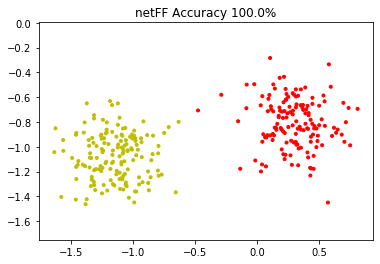

In [127]:
mu0 = netx.Generate(15., train[1].to(device), dt=0.001)
acc = FF.ClassificationAccuracy(mu0.cpu().numpy(), train[0].cpu().numpy())
ClassPlot(train[1], labels=mu0.cpu(), idx=(0,1))
plt.title('netFF Accuracy '+str(acc*100)+'%');

## Ambiguous Input

In [17]:
# Make a more ambiguous input
lam = 1.
ambig = lam*A[0,:] + (1.-lam)*A[1,:]
print(ambig)
print(A)
some_noise = np.random.normal(size=(sensory_dim)) * noise
print(some_noise)

ambig = torch.tensor(ambig).float().to(device)
ambig = torch.unsqueeze(ambig, dim=0)
print(ambig)
print(ambig.shape)

some_noise = torch.tensor(some_noise).float().to(device)
some_noise = torch.unsqueeze(some_noise, dim=0)
print(some_noise)
print(some_noise.shape)

[ 1.25062074 -0.70485675  1.25400319  0.68385445]
[[ 1.25062074 -0.70485675  1.25400319  0.68385445]
 [ 0.26562574  0.84961614  0.98206504 -0.71855873]]
[ 0.12992732  0.15448402 -0.15166122  0.40372464]
tensor([[ 1.2506, -0.7049,  1.2540,  0.6839]], device='cuda:0')
torch.Size([1, 4])
tensor([[ 0.1299,  0.1545, -0.1517,  0.4037]], device='cuda:0')
torch.Size([1, 4])


## Convergence of `netFF`

torch.Size([1, 2])


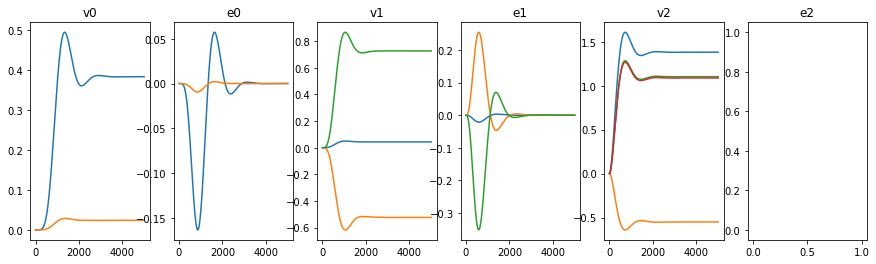

In [18]:
# Convergence of netFF
netx = netFF
netx.Allocate(ambig)
netx.Reset()

netx.layers[0].Probe(True)
netx.layers[1].Probe(True)
netx.layers[2].Probe(True)

for l in net.layers:
    l.v_decay = 0.0

mu0 = netx.Generate(5., ambig+some_noise/1., dt=0.001)

print(mu0.shape)

if (len(mu0.shape) > 1):
    plt.figure(figsize=(15,4)); p = 6;
    
    plt.subplot(1,p,1); plt.plot( np.squeeze(netx.layers[0].v_history) );
    plt.title('v0')
    plt.subplot(1,p,2); plt.plot(np.squeeze(netx.layers[0].e_history)); plt.title('e0')
    plt.subplot(1,p,3); plt.plot(np.squeeze(netx.layers[1].v_history)); plt.title('v1')
    plt.subplot(1,p,4); plt.plot(np.squeeze(netx.layers[1].e_history)); plt.title('e1')
    plt.subplot(1,p,5); plt.plot(np.squeeze(netx.layers[2].v_history)); plt.title('v2')
    plt.subplot(1,p,6); plt.plot(np.squeeze(netx.layers[2].e_history)); plt.title('e2');    
else:
    plt.figure(figsize=(15,4)); p = 6;
    plt.subplot(1,p,1); plt.plot( netx.layers[0].v_history );
    plt.title('v0')
    plt.subplot(1,p,2); plt.plot(netx.layers[0].e_history); plt.title('e0')
    plt.subplot(1,p,3); plt.plot(netx.layers[1].v_history); plt.title('v1')
    plt.subplot(1,p,4); plt.plot(netx.layers[1].e_history); plt.title('e1')
    plt.subplot(1,p,5); plt.plot(netx.layers[2].v_history); plt.title('v2')
    plt.subplot(1,p,6); plt.plot(netx.layers[2].e_history); plt.title('e2');

In [19]:
sum_e = 0
for l in netx.layers:
    sum_e += torch.norm(l.e)
print(sum_e)

tensor(2.0222e-05, device='cuda:0')


## Train the raw PC network -> `netPC`

In [ ]:
netPC = deepcopy(net)

In [ ]:
netx = netPC
netx.SetWeightDecay(0.007)
netx.SetvDecay(0.0)
netx.Learn(train[0].to(device), train[1].to(device), T=5., dt=0.001, epochs=10, batch_size=30, shuffle=False)

In [ ]:
for c in netx.connections:
    print(c.M)
    print(c.W)

In [ ]:
mu0 = netx.Generate(5., train[1].to(device), dt=0.001)
acc = FF.ClassificationAccuracy(mu0.cpu().numpy(), train[0].cpu().numpy())
ClassPlot(train[1], labels=mu0.cpu(), idx=(0,1));
plt.title('netPC Accuracy '+str(acc*100)+'%');

## Convergence of `netPC`

In [ ]:
# Convergence of netPC
netx = netPC
netx.Allocate(ambig)
netx.Reset()

for l in netx.layers:
    l.v_decay=0.0

netx.layers[0].Probe(True)
netx.layers[1].Probe(True)
netx.layers[2].Probe(True)

mu0 = netx.Generate(10., ambig+some_noise/1., dt=0.001)

if (len(mu0.shape) > 1):
    plt.figure(figsize=(15,4)); p = 6;
    
    plt.subplot(1,p,1); plt.plot( np.squeeze(netx.layers[0].v_history) );
    plt.title('x0')
    plt.subplot(1,p,2); plt.plot(np.squeeze(netx.layers[0].e_history)); plt.title('e0')
    plt.subplot(1,p,3); plt.plot(np.squeeze(netx.layers[1].v_history)); plt.title('x1')
    plt.subplot(1,p,4); plt.plot(np.squeeze(netx.layers[1].e_history)); plt.title('e1')
    plt.subplot(1,p,5); plt.plot(np.squeeze(netx.layers[2].v_history)); plt.title('x2')
    plt.subplot(1,p,6); plt.plot(np.squeeze(netx.layers[2].e_history)); plt.title('e2');   

else:
    plt.figure(figsize=(15,4)); p = 6;
    plt.subplot(1,p,1); plt.plot(netx.layers[0].v_history); plt.title('x0')
    plt.subplot(1,p,2); plt.plot(netx.layers[0].e_history); plt.title('e0')
    plt.subplot(1,p,3); plt.plot(netx.layers[1].v_history); plt.title('x1')
    plt.subplot(1,p,4); plt.plot(netx.layers[1].e_history); plt.title('e1')
    plt.subplot(1,p,5); plt.plot(netx.layers[2].v_history); plt.title('x2')
    plt.subplot(1,p,6); plt.plot(netx.layers[2].e_history); plt.title('e2');

In [ ]:
sum_e = 0
for l in netx.layers:
    sum_e += torch.norm(l.e)
print(sum_e)

In [ ]:
legend = ['$x_0^{(0)}$', '$x_1^{(0)}$']
x = np.linspace(0, 10, 10000)
plt.plot(x, np.squeeze(netx.layers[0].v_history))
plt.xlabel('Time (s)')
plt.ylabel('Norm of Node Values')
plt.title('$x^{(0)}$')
plt.legend(legend)
plt.savefig("x0.pdf", format='pdf')

In [ ]:
legend = ['$e_0^{(0)}$', '$e_1^{(0)}$']
x = np.linspace(0, 10, 10000)
plt.plot(x, np.squeeze(netx.layers[0].e_history))
plt.xlabel('Time (s)')
plt.ylabel('Norm of Node Values')
plt.title('$e^{(0)}$')
plt.legend(legend)
plt.savefig("e0.pdf", format='pdf')

In [ ]:
legend = ['$x_0^{(1)}$', '$x_1^{(1)}$', '$x_2^{(1)}$']
x = np.linspace(0, 10, 10000)
plt.plot(x, np.squeeze(netx.layers[1].v_history))
plt.xlabel('Time (s)')
plt.ylabel('Norm of Node Values')
plt.title('$x^{(1)}$')
plt.legend(legend)
plt.savefig("x1.pdf", format='pdf')

In [ ]:
legend = ['$e_0^{(1)}$', '$e_1^{(1)}$', '$e_2^{(1)}$']
x = np.linspace(0, 10, 10000)
plt.plot(x, np.squeeze(netx.layers[1].e_history))
plt.xlabel('Time (s)')
plt.ylabel('Norm of Node Values')
plt.title('$e^{(1)}$')
plt.legend(legend)
plt.savefig("e1.pdf", format='pdf')

In [ ]:
legend = ['$x_0^{(2)}$', '$x_1^{(2)}$', '$x_2^{(2)}$', '$x_3^{(2)}$']
x = np.linspace(0, 10, 10000)
plt.plot(x, np.squeeze(netx.layers[2].v_history))
plt.xlabel('Time (s)')
plt.ylabel('Norm of Node Values')
plt.title('$x^{(2)}$')
plt.legend(legend)
plt.savefig("x2.pdf", format='pdf')

## Norm of the weight matrix

In [ ]:
netx = netFF
for l in range(len(netx.layers)-1):
    print('Layer '+str(l))
    print('   M: '+str(torch.norm(netx.connections[l].M).item()))
    print('   W: '+str(torch.norm(netx.connections[l].W).item()))

In [ ]:
netx = netPC
for l in range(len(netx.layers)-1):
    print('Layer '+str(l))
    print('   M: '+str(torch.norm(netx.connections[l].M).item()))
    print('   W: '+str(torch.norm(netx.connections[l].W).item()))

# Stability Analysis

2-3-4 network.

\begin{equation}
\dot{v}_{0}^{(0)} = -\beta_{0}^{(0)} e_{0}^{(0)}
\end{equation}

\begin{equation}
\dot{v}_{1}^{(0)} = -\beta_{1}^{(0)} e_{1}^{(0)}
\end{equation}

\begin{equation}
\dot{v}_{0}^{(1)} = -\beta_{0}^{(1)} e_{0}^{(1)} + \alpha_{0}^{(1)} \sum_{i=0}^{1} {e_{i}^{(0)} W_{i,0}^{(0)} f'\left(v_{0}^{(1)}\right)}
\end{equation}

\begin{equation}
\dot{v}_{1}^{(1)} = -\beta_{1}^{(1)} e_{1}^{(1)} + \alpha_{1}^{(1)} \sum_{i=0}^{1} {e_{i}^{(0)} W_{i,1}^{(0)} f'\left(v_{1}^{(1)}\right)}
\end{equation}

\begin{equation}
\dot{v}_{2}^{(1)} = -\beta_{2}^{(1)} e_{2}^{(1)} + \alpha_{2}^{(1)} \sum_{i=0}^{1} {e_{i}^{(0)} W_{i,2}^{(0)} f'\left(v_{2}^{(1)}\right)}
\end{equation}

\begin{equation}
\dot{v}_{0}^{(2)} = -\beta_{0}^{(2)} e_{0}^{(2)} + \alpha_{0}^{(2)} \sum_{i=0}^{2} {e_{i}^{(1)} W_{i,0}^{(1)} f'\left(v_{0}^{(2)}\right)}
\end{equation}

\begin{equation}
\dot{v}_{1}^{(2)} = -\beta_{1}^{(2)} e_{1}^{(2)} + \alpha_{1}^{(2)} \sum_{i=0}^{2} {e_{i}^{(1)} W_{i,1}^{(1)} f'\left(v_{1}^{(2)}\right)}
\end{equation}

\begin{equation}
\dot{v}_{2}^{(2)} = -\beta_{2}^{(2)} e_{2}^{(2)} + \alpha_{2}^{(2)} \sum_{i=0}^{2} {e_{i}^{(1)} W_{i,2}^{(1)} f'\left(v_{2}^{(2)}\right)}
\end{equation}

\begin{equation}
\dot{v}_{3}^{(2)} = -\beta_{3}^{(2)} e_{3}^{(2)} + \alpha_{3}^{(2)} \sum_{i=0}^{2} {e_{i}^{(1)} W_{i,3}^{(1)} f'\left(v_{3}^{(2)}\right)}
\end{equation}

\begin{equation}
\dot{e}_{0}^{(0)} = v_{0}^{(0)} - \sum_{i=0}^{2} {f\left(v_{i}^{(1)}\right) M_{i,0}^{(0)} + b_{0}^{(0)}} - e_{0}^{(0)}
\end{equation}

\begin{equation}
\dot{e}_{1}^{(0)} = v_{1}^{(0)} - \sum_{i=0}^{2} {f\left(v_{i}^{(1)}\right) M_{i,1}^{(0)} + b_{1}^{(0)}} - e_{1}^{(0)}
\end{equation}

\begin{equation}
\dot{e}_{0}^{(1)} = v_{0}^{(1)} - \sum_{i=0}^{3} {f\left(v_{i}^{(2)}\right) M_{i,0}^{(1)} + b_{0}^{(1)}} - e_{0}^{(1)}
\end{equation}

\begin{equation}
\dot{e}_{1}^{(1)} = v_{1}^{(1)} - \sum_{i=0}^{3} {f\left(v_{i}^{(2)}\right) M_{i,1}^{(1)} + b_{1}^{(1)}} - e_{1}^{(1)}
\end{equation}

\begin{equation}
\dot{e}_{2}^{(1)} = v_{2}^{(1)} - \sum_{i=0}^{3} {f\left(v_{i}^{(2)}\right) M_{i,2}^{(1)} + b_{2}^{(1)}} - e_{2}^{(1)}
\end{equation}

\begin{equation}
\dot{e}_{0}^{(2)} = v_{0}^{(2)} - expectation_{0} - e_{0}^{(2)}
\end{equation}

\begin{equation}
\dot{e}_{1}^{(2)} = v_{1}^{(2)} - expectation_{1} - e_{1}^{(2)}
\end{equation}

\begin{equation}
\dot{e}_{2}^{(2)} = v_{2}^{(2)} - expectation_{2} - e_{2}^{(2)}
\end{equation}

\begin{equation}
\dot{e}_{3}^{(2)} = v_{3}^{(2)} - expectation_{3} - e_{3}^{(2)}
\end{equation}

In [ ]:
# Choose ur network
netx = netFF
netx = netPC

In [37]:
# Get Equilibrium Point

netx.Allocate(ambig)
netx.Reset()
netx.SetBidirectional()
netx.layers[0].SetFB()
netx.layers[-1].SetBidirectional()

mu0 = netx.BackprojectExpectation(ambig+some_noise/1.)
netx.layers[0].v = mu0

In [38]:
'''
Setting up the system of equations and computing the Jacobian in Sympy.

Currently, the v's and e's are Sympy symbols and the rest are hard coded constants from the network.
'''

#DEs
v0_0 = sp.Symbol('v0_0')
v1_0 = sp.Symbol('v1_0')
v0_1 = sp.Symbol('v0_1')
v1_1 = sp.Symbol('v1_1')
v2_1 = sp.Symbol('v2_1')
v0_2 = sp.Symbol('v0_2')
v1_2 = sp.Symbol('v1_2')
v2_2 = sp.Symbol('v2_2')
v3_2 = sp.Symbol('v3_2')

e0_0 = sp.Symbol('e0_0')
e1_0 = sp.Symbol('e1_0')
e0_1 = sp.Symbol('e0_1')
e1_1 = sp.Symbol('e1_1')
e2_1 = sp.Symbol('e2_1')
e0_2 = sp.Symbol('e0_2')
e1_2 = sp.Symbol('e1_2')
e2_2 = sp.Symbol('e2_2')
e3_2 = sp.Symbol('e3_2')

#Alphas and Betas
B0_0 = netx.layers[0].beta[0].cpu().numpy()
B1_0 = netx.layers[0].beta[1].cpu().numpy()
B0_1 = netx.layers[1].beta[0].cpu().numpy()
B1_1 = netx.layers[1].beta[1].cpu().numpy()
B2_1 = netx.layers[1].beta[2].cpu().numpy()
B0_2 = netx.layers[2].beta[0].cpu().numpy()
B1_2 = netx.layers[2].beta[1].cpu().numpy()
B2_2 = netx.layers[2].beta[2].cpu().numpy()
B3_2 = netx.layers[2].beta[3].cpu().numpy()

A0_0 = netx.layers[0].alpha[0].cpu().numpy()
A1_0 = netx.layers[0].alpha[1].cpu().numpy()
A0_1 = netx.layers[1].alpha[0].cpu().numpy()
A1_1 = netx.layers[1].alpha[1].cpu().numpy()
A2_1 = netx.layers[1].alpha[2].cpu().numpy()
A0_2 = netx.layers[2].alpha[0].cpu().numpy()
A1_2 = netx.layers[2].alpha[1].cpu().numpy()
A2_2 = netx.layers[2].alpha[2].cpu().numpy()
A3_2 = netx.layers[2].alpha[3].cpu().numpy()

#Expectation
expectation = ambig+some_noise/1.
exp0 = expectation[0][0].cpu().numpy()
exp1 = expectation[0][1].cpu().numpy()
exp2 = expectation[0][2].cpu().numpy()
exp3 = expectation[0][3].cpu().numpy()

#Feedforward Weights
M0 = netx.connections[0].M.cpu().numpy()
M1 = netx.connections[1].M.cpu().numpy()

b0_0 = netx.layers[0].b[0].cpu().numpy()
b1_0 = netx.layers[0].b[1].cpu().numpy()
b0_1 = netx.layers[1].b[0].cpu().numpy()
b1_1 = netx.layers[1].b[1].cpu().numpy()
b2_1 = netx.layers[1].b[2].cpu().numpy()

#Feedback Weights
W0 = netx.connections[0].W.cpu().numpy()
W1 = netx.connections[1].W.cpu().numpy()

#Activations and their derivatives
f0_1 = sp.Id(v0_1)#1. / (1 + sp.exp(-v0_1) ) #Logistic function for activities at layer 1
f1_1 = sp.Id(v1_1)#1. / (1 + sp.exp(-v1_1) )
f2_1 = sp.Id(v2_1)#1. / (1 + sp.exp(-v2_1) )
f0_2 = sp.Id(v0_2) #Identity function for activities at layer 2
f1_2 = sp.Id(v1_2)
f2_2 = sp.Id(v2_2)
f3_2 = sp.Id(v3_2)

fp0_1 = sp.diff(f0_1, v0_1)
fp1_1 = sp.diff(f1_1, v1_1)
fp2_1 = sp.diff(f2_1, v2_1)
fp0_2 = sp.diff(f0_2, v0_2)
fp1_2 = sp.diff(f1_2, v1_2)
fp2_2 = sp.diff(f2_2, v2_2)
fp3_2 = sp.diff(f3_2, v3_2)

DEs = sp.Matrix([-1.0*B0_0*e0_0, 
            -1.0*B1_0*e1_0, 
            -1.0*B0_1*e0_1 + A0_1*fp0_1*(e0_0*W0[0][0] + e1_0*W0[1][0]), 
            -1.0*B1_1*e1_1 + A1_1*fp1_1*(e0_0*W0[0][1] + e1_0*W0[1][1]), 
            -1.0*B2_1*e2_1 + A2_1*fp2_1*(e0_0*W0[0][2] + e1_0*W0[1][2]),
            -1.0*B0_2*e0_2 + A0_2*fp0_2*(e0_1*W1[0][0] + e1_1*W1[1][0] + e2_1*W1[2][0]), 
            -1.0*B1_2*e1_2 + A1_2*fp1_2*(e0_1*W1[0][1] + e1_1*W1[1][1] + e2_1*W1[2][1]),
            -1.0*B2_2*e2_2 + A2_2*fp2_2*(e0_1*W1[0][2] + e1_1*W1[1][2] + e2_1*W1[2][2]),
            -1.0*B3_2*e3_2 + A3_2*fp3_2*(e0_1*W1[0][3] + e1_1*W1[1][3] + e2_1*W1[2][3]),
            v0_0 - (f0_1*M0[0][0] + f1_1*M0[1][0] + f2_1*M0[2][0]) - e0_0, 
            v1_0 - (f0_1*M0[0][1] + f1_1*M0[1][1] + f2_1*M0[2][1]) - e1_0, 
            v0_1 - (f0_2*M1[0][0] + f1_2*M1[1][0] + f2_2*M1[2][0] + f3_2*M1[3][0]) - e0_1,
            v1_1 - (f0_2*M1[0][1] + f1_2*M1[1][1] + f2_2*M1[2][1] + f3_2*M1[3][1]) - e1_1,
            v2_1 - (f0_2*M1[0][2] + f1_2*M1[1][2] + f2_2*M1[2][2] + f3_2*M1[3][2]) - e2_1,
            v0_2 - exp0 - e0_2,
            v1_2 - exp1 - e1_2,
            v2_2 - exp2 - e2_2,
            v3_2 - exp3 - e3_2,])

variables = sp.Matrix([v0_0, v1_0, v0_1, v1_1, v2_1, v0_2, v1_2, v2_2, v3_2, 
                             e0_0, e1_0, e0_1, e1_1, e2_1, e0_2, e1_2, e2_2, e3_2])

Jacobian = DEs.jacobian(variables)
print(Jacobian)

Matrix([[0, 0, 0, 0, 0, 0, 0, 0, 0, -1.00000000000000, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1.00000000000000, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0234453510493040, 0.102034777402878, -1.00000000000000, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, -0.257500767707825, -0.311238884925842, 0, -1.00000000000000, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.339967221021652, -0.197204053401947, 0, 0, -1.00000000000000, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0272469520568848, -0.199147015810013, 0.187713935971260, -1.00000000000000, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0527050942182541, -0.0897117406129837, -0.249060705304146, 0, -1.00000000000000, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0744948163628578, -0.333745211362839, 0.0766697898507118, 0, 0, -1.00000000000000, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0434851534664631, 0.0638500377535820, 0.226555153727531, 0, 0, 0, -1.00000000000000], [1, 0, -0.0234454, 0.257501, -0.339967, 

In [39]:
equilibrium_jacobian = Jacobian.subs({v0_0: netx.layers[0].v[0][0].cpu().numpy(),
              v1_0: netx.layers[0].v[0][1].cpu().numpy(),
              v0_1: netx.layers[1].v[0][0].cpu().numpy(),
              v1_1: netx.layers[1].v[0][1].cpu().numpy(),
              v2_1: netx.layers[1].v[0][2].cpu().numpy(),
              v0_2: netx.layers[2].v[0][0].cpu().numpy(),
              v1_2: netx.layers[2].v[0][1].cpu().numpy(),
              v2_2: netx.layers[2].v[0][2].cpu().numpy(),
              v3_2: netx.layers[2].v[0][3].cpu().numpy(),
              e0_0: netx.layers[0].e[0][0].cpu().numpy(),
              e1_0: netx.layers[0].e[0][1].cpu().numpy(),
              e0_1: netx.layers[1].e[0][0].cpu().numpy(),
              e1_1: netx.layers[1].e[0][1].cpu().numpy(),
              e2_1: netx.layers[1].e[0][2].cpu().numpy(),
              e0_2: netx.layers[2].e[0][0].cpu().numpy(),
              e1_2: netx.layers[2].e[0][1].cpu().numpy(),
              e2_2: netx.layers[2].e[0][2].cpu().numpy(),
              e3_2: netx.layers[2].e[0][3].cpu().numpy(),
              })
print(equilibrium_jacobian)

Matrix([[0, 0, 0, 0, 0, 0, 0, 0, 0, -1.00000000000000, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1.00000000000000, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0234453510493040, 0.102034777402878, -1.00000000000000, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, -0.257500767707825, -0.311238884925842, 0, -1.00000000000000, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.339967221021652, -0.197204053401947, 0, 0, -1.00000000000000, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0272469520568848, -0.199147015810013, 0.187713935971260, -1.00000000000000, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0527050942182541, -0.0897117406129837, -0.249060705304146, 0, -1.00000000000000, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0744948163628578, -0.333745211362839, 0.0766697898507118, 0, 0, -1.00000000000000, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0434851534664631, 0.0638500377535820, 0.226555153727531, 0, 0, 0, -1.00000000000000], [1, 0, -0.0234454, 0.257501, -0.339967, 

In [40]:
numpy_equilibrium_jacobian = np.array(equilibrium_jacobian, dtype=float)
evals, evecs = np.linalg.eig(numpy_equilibrium_jacobian)

In [41]:
for i in range (len(evals)):
    print(evals[i])

(-0.49999999999999956+1.2298353072861639j)
(-0.49999999999999956-1.2298353072861639j)
(-0.5000000000000007+1.179222988310043j)
(-0.5000000000000007-1.179222988310043j)
(-0.4999999999999998+0.517270786108394j)
(-0.4999999999999998-0.517270786108394j)
(-0.4999999999999999+0.5647155960072718j)
(-0.4999999999999999-0.5647155960072718j)
(-0.49999999999999983+0.9199105406844533j)
(-0.49999999999999983-0.9199105406844533j)
(-0.5000000000000007+0.9063325222886277j)
(-0.5000000000000007-0.9063325222886277j)
(-0.5000000000000014+0.8660254046230843j)
(-0.5000000000000014-0.8660254046230843j)
(-0.4999999999999999+0.8660254029457941j)
(-0.4999999999999999-0.8660254029457941j)
(-0.5+0.8660254037844387j)
(-0.5-0.8660254037844387j)


In [42]:
print(evecs[:])

[[ 2.74216817e-01-9.43689571e-16j  2.74216817e-01+9.43689571e-16j
   4.05161757e-02+9.55552115e-02j  4.05161757e-02-9.55552115e-02j
  -3.99705815e-01+0.00000000e+00j -3.99705815e-01-0.00000000e+00j
   1.43937626e-01-1.04083409e-16j  1.43937626e-01+1.04083409e-16j
  -2.16282889e-01-3.97921819e-01j -2.16282889e-01+3.97921819e-01j
  -8.14468532e-02-1.47635864e-01j -8.14468532e-02+1.47635864e-01j
  -3.11857785e-09-5.40153707e-09j -3.11857785e-09+5.40153707e-09j
   3.11857774e-09+5.40153683e-09j  3.11857774e-09-5.40153683e-09j
   2.55457594e-16-3.12801204e-15j  2.55457594e-16+3.12801204e-15j]
 [ 1.01187742e-01+6.80011603e-16j  1.01187742e-01-6.80011603e-16j
  -1.09804695e-01-2.58968440e-01j -1.09804695e-01+2.58968440e-01j
  -1.47492443e-01-3.33066907e-16j -1.47492443e-01+3.33066907e-16j
  -3.90085395e-01+0.00000000e+00j -3.90085395e-01-0.00000000e+00j
  -7.98055350e-02-1.46827906e-01j -7.98055350e-02+1.46827906e-01j
   2.20720451e-01+4.00092247e-01j  2.20720451e-01-4.00092247e-01j
   6.4498

In [27]:
#Look at eigenvalues where Generate() stops
netx.Reset()

for l in net.layers:
    l.v_decay = 0.0

mu0 = netx.Generate(5., ambig+some_noise/1., dt=0.001)

In [28]:
generate_jacobian = Jacobian.subs({v0_0: netx.layers[0].v[0][0].cpu().numpy(),
              v1_0: netx.layers[0].v[0][1].cpu().numpy(),
              v0_1: netx.layers[1].v[0][0].cpu().numpy(),
              v1_1: netx.layers[1].v[0][1].cpu().numpy(),
              v2_1: netx.layers[1].v[0][2].cpu().numpy(),
              v0_2: netx.layers[2].v[0][0].cpu().numpy(),
              v1_2: netx.layers[2].v[0][1].cpu().numpy(),
              v2_2: netx.layers[2].v[0][2].cpu().numpy(),
              v3_2: netx.layers[2].v[0][3].cpu().numpy(),
              e0_0: netx.layers[0].e[0][0].cpu().numpy(),
              e1_0: netx.layers[0].e[0][1].cpu().numpy(),
              e0_1: netx.layers[1].e[0][0].cpu().numpy(),
              e1_1: netx.layers[1].e[0][1].cpu().numpy(),
              e2_1: netx.layers[1].e[0][2].cpu().numpy(),
              e0_2: netx.layers[2].e[0][0].cpu().numpy(),
              e1_2: netx.layers[2].e[0][1].cpu().numpy(),
              e2_2: netx.layers[2].e[0][2].cpu().numpy(),
              e3_2: netx.layers[2].e[0][3].cpu().numpy(),
              })
print(generate_jacobian)

Matrix([[0, 0, 0, 0, 0, 0, 0, 0, 0, -1.00000000000000, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1.00000000000000, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0234453510493040, 0.102034777402878, -1.00000000000000, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, -0.257500767707825, -0.311238884925842, 0, -1.00000000000000, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.339967221021652, -0.197204053401947, 0, 0, -1.00000000000000, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0272469520568848, -0.199147015810013, 0.187713935971260, -1.00000000000000, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0527050942182541, -0.0897117406129837, -0.249060705304146, 0, -1.00000000000000, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0744948163628578, -0.333745211362839, 0.0766697898507118, 0, 0, -1.00000000000000, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0434851534664631, 0.0638500377535820, 0.226555153727531, 0, 0, 0, -1.00000000000000], [1, 0, -0.0234454, 0.257501, -0.339967, 

In [31]:
numpy_equilibrium_jacobian = np.array(equilibrium_jacobian, dtype=float)
evals, evecs = np.linalg.eig(numpy_equilibrium_jacobian)

In [32]:
for i in range (len(evals)):
    print(evals[i])

(-0.49999999999999956+1.2298353072861639j)
(-0.49999999999999956-1.2298353072861639j)
(-0.5000000000000007+1.179222988310043j)
(-0.5000000000000007-1.179222988310043j)
(-0.4999999999999998+0.517270786108394j)
(-0.4999999999999998-0.517270786108394j)
(-0.4999999999999999+0.5647155960072718j)
(-0.4999999999999999-0.5647155960072718j)
(-0.49999999999999983+0.9199105406844533j)
(-0.49999999999999983-0.9199105406844533j)
(-0.5000000000000007+0.9063325222886277j)
(-0.5000000000000007-0.9063325222886277j)
(-0.5000000000000014+0.8660254046230843j)
(-0.5000000000000014-0.8660254046230843j)
(-0.4999999999999999+0.8660254029457941j)
(-0.4999999999999999-0.8660254029457941j)
(-0.5+0.8660254037844387j)
(-0.5-0.8660254037844387j)


In [34]:
print(evecs[:])

[[ 2.74216817e-01-9.43689571e-16j  2.74216817e-01+9.43689571e-16j
   4.05161757e-02+9.55552115e-02j  4.05161757e-02-9.55552115e-02j
  -3.99705815e-01+0.00000000e+00j -3.99705815e-01-0.00000000e+00j
   1.43937626e-01-1.04083409e-16j  1.43937626e-01+1.04083409e-16j
  -2.16282889e-01-3.97921819e-01j -2.16282889e-01+3.97921819e-01j
  -8.14468532e-02-1.47635864e-01j -8.14468532e-02+1.47635864e-01j
  -3.11857785e-09-5.40153707e-09j -3.11857785e-09+5.40153707e-09j
   3.11857774e-09+5.40153683e-09j  3.11857774e-09-5.40153683e-09j
   2.55457594e-16-3.12801204e-15j  2.55457594e-16+3.12801204e-15j]
 [ 1.01187742e-01+6.80011603e-16j  1.01187742e-01-6.80011603e-16j
  -1.09804695e-01-2.58968440e-01j -1.09804695e-01+2.58968440e-01j
  -1.47492443e-01-3.33066907e-16j -1.47492443e-01+3.33066907e-16j
  -3.90085395e-01+0.00000000e+00j -3.90085395e-01-0.00000000e+00j
  -7.98055350e-02-1.46827906e-01j -7.98055350e-02+1.46827906e-01j
   2.20720451e-01+4.00092247e-01j  2.20720451e-01-4.00092247e-01j
   6.4498